In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
file_path = '/Users/fullf500.csv'

In [133]:
#load dataset into dataframe
df = pd.read_csv(file_path)

In [66]:
df.head(5)

,COMPANY,RANK,RANK_CHANGE,REVENUE,PROFIT,NUM_OF_EMPLOYEES,SECTOR,CITY,STATE,NEWCOMER,...,DROPPED_OUT,YR_TURNED_CEO,PREVIOUSLY_CEO,SECOND_MAST_MAJOR,SECOND_MAST_SCHOOL,THIRD_MAST_MAJOR,THIRD_MAST_SCHOOL,ZODIAC,AGE,AGE_TURNED_CEO
0,Texas Instruments,198,12,18344,7769.0,31000,Technology,Dallas,TX,no,...,no,11/1/2004,no,NaN,NaN,NaN,NaN,NaN,65.0,46.0
1,Emerson Electric,199,-18,18236,2303.0,86700,Industrials,St. Louis,MO,no,...,no,11/1/2021,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WESCO International,200,45,18218,465.0,18000,Wholesalers,Pittsburgh,PA,no,...,no,11/1/2009,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,General Mills,201,-32,18127,2340.0,35000,"Food, Beverages & Tobacco",Minneapolis,MN,no,...,no,11/1/2017,"yes, of internal subsidiary",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tenneco,202,-3,18035,35.0,71000,Motor Vehicles & Parts,Lake Forest,IL,no,...,no,11/1/2017,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.columns

Index(['COMPANY', 'RANK', 'RANK_CHANGE', 'REVENUE', 'PROFIT',
       'NUM_OF_EMPLOYEES', 'SECTOR', 'CITY', 'STATE', 'NEWCOMER',
       'CEO_FOUNDER', 'CEO_WOMAN', 'PROFITABLE', 'PREV_RANK', 'CEO', 'WEBSITE',
       'TICKER', 'MARKET_CAP', 'CEO_NAME', 'CEO_DOB', 'DOB_MMDD', 'DOB_YYYY',
       'MISSING_DOBS', 'BIRTH_CITY', 'BIRTH_STATE', 'ORIGIN_STATE',
       'CURRENT_RESIDENCE', 'CEO_BACH_MAJOR', 'CEO_BACH_SCHOOL',
       'CEO_MAST_MAJOR', 'CEO_MAST_SCHOOL', 'PHD', 'DROPPED_OUT',
       'YR_TURNED_CEO', 'PREVIOUSLY_CEO', 'SECOND_MAST_MAJOR',
       'SECOND_MAST_SCHOOL', 'THIRD_MAST_MAJOR', 'THIRD_MAST_SCHOOL', 'ZODIAC',
       'AGE', 'AGE_TURNED_CEO'],
      dtype='object')

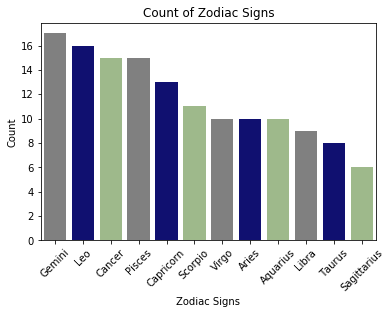

In [61]:
#define custom color palette
custom_palette = ["#808080", "#000080", "#9DC183"]  # grey, navy, sage sreen

#set color palette
sns.set_palette(custom_palette)

#plot zodiac counts
sns.barplot(x=df['ZODIAC'].value_counts().index, y=df['ZODIAC'].value_counts().values, palette=custom_palette)
plt.title('Count of Zodiac Signs')
plt.xlabel('Zodiac Signs')
plt.ylabel('Count')
plt.xticks(rotation=45)  #rotate x-axis labels for better readability
plt.show()

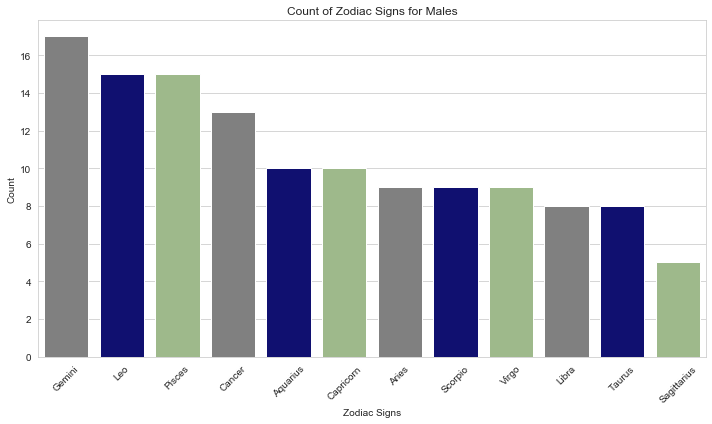

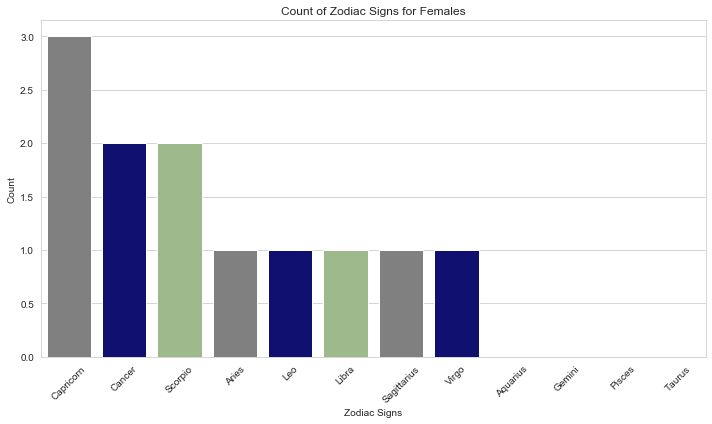

In [76]:
#calculate the counts of each zodiac sign by gender
zodiac_counts = df.groupby(['ZODIAC', 'CEO_WOMAN']).size().unstack(fill_value=0)

#define custom color palette
custom_palette = ["#808080", "#000080", "#9DC183"]  # grey, navy, sage green

#set color palette
sns.set_palette(custom_palette)

#plot of zodiac counts for males
plt.figure(figsize=(10, 6))
sns.barplot(x='ZODIAC', y='no', data=zodiac_counts.reset_index().sort_values(by='no', ascending=False), palette=custom_palette)
plt.title('Count of Zodiac Signs for Males')
plt.xlabel('Zodiac Signs')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#plot of zodiac counts for females
plt.figure(figsize=(10, 6))
sns.barplot(x='ZODIAC', y='yes', data=zodiac_counts.reset_index().sort_values(by='yes', ascending=False), palette=custom_palette)
plt.title('Count of Zodiac Signs for Females')
plt.xlabel('Zodiac Signs')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

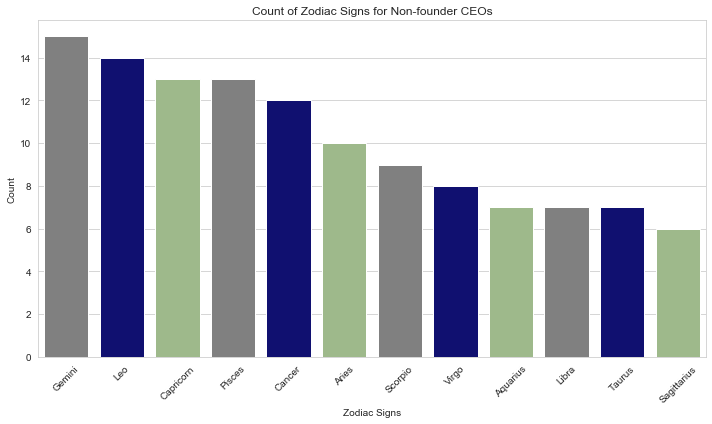

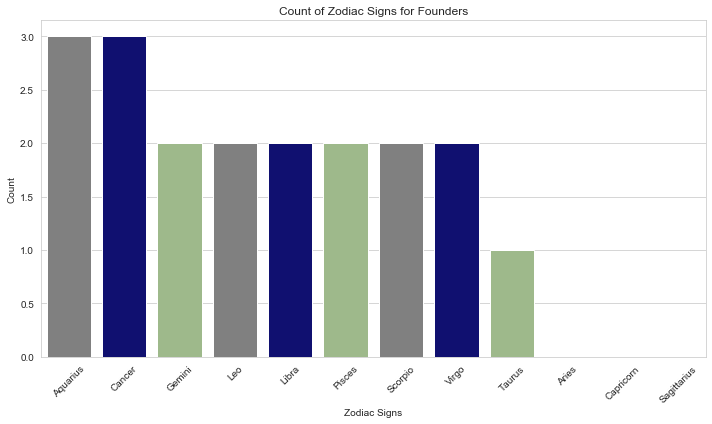

In [77]:
#calculate the counts of each zodiac sign by founder status
zodiac_counts = df.groupby(['ZODIAC', 'CEO_FOUNDER']).size().unstack(fill_value=0)

#define custom color palette
custom_palette = ["#808080", "#000080", "#9DC183"]  # grey, navy, sage green

#set color palette
sns.set_palette(custom_palette)

#plot of zodiac counts for non-founders
plt.figure(figsize=(10, 6))
sns.barplot(x='ZODIAC', y='no', data=zodiac_counts.reset_index().sort_values(by='no', ascending=False), palette=custom_palette)
plt.title('Count of Zodiac Signs for Non-founder CEOs')
plt.xlabel('Zodiac Signs')
plt.ylabel('Count')
plt.xticks(rotation=45)  #rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#plot of zodiac counts for founders
plt.figure(figsize=(10, 6))
sns.barplot(x='ZODIAC', y='yes', data=zodiac_counts.reset_index().sort_values(by='yes', ascending=False), palette=custom_palette)
plt.title('Count of Zodiac Signs for Founders')
plt.xlabel('Zodiac Signs')
plt.ylabel('Count')
plt.xticks(rotation=45)  #rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [85]:
#calculate the counts of each CEO Bachelor Major
ceo_bach_major_counts = df['CEO_BACH_MAJOR'].value_counts().reset_index()
ceo_bach_major_counts.columns = ['CEO_BACH_MAJOR', 'Count']

#sort in descending order
sorted_df = ceo_bach_major_counts.sort_values(by='Count', ascending=False)

#limit to the top 10 rows
top_10 = sorted_df.head(10)

#display top 10
top_10

,CEO_BACH_MAJOR,Count
0,Economics,46
1,Business Administration,43
2,Accounting,32
3,Finance,27
4,Mechanical Engineering,25
5,Electrical Engineering,24
6,Chemical Engineering,19
7,Engineering,17
8,Political Science,15
9,Industrial Engineering,10


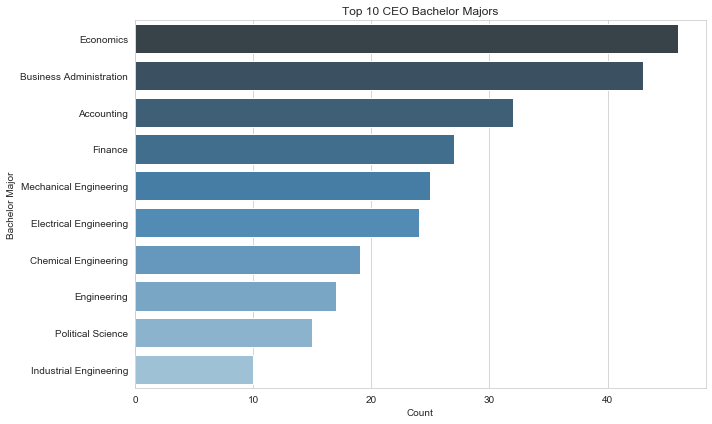

In [86]:
#set the style
sns.set_style("whitegrid")

#create bar plot for the top 10 CEO Bachelor Majors
plt.figure(figsize=(10, 6))  
sns.barplot(x='Count', y='CEO_BACH_MAJOR', data=top_10, palette='Blues_d')

#add titles and labels
plt.title('Top 10 CEO Bachelor Majors')
plt.xlabel('Count')
plt.ylabel('Bachelor Major')

#show plot
plt.tight_layout()
plt.show()

In [81]:
#calculate the counts of each CEO Master Major
ceo_mast_major_counts = df['CEO_MAST_MAJOR'].value_counts().reset_index()
ceo_mast_major_counts.columns = ['CEO_MAST_MAJOR', 'Count']

#sort in descending order
sorted_df = ceo_mast_major_counts.sort_values(by='Count', ascending=False)

#limit to the top 10 rows
top_10 = sorted_df.head(10)

#display top 10
top_10

,CEO_MAST_MAJOR,Count
0,MBA,205
1,no,181
2,JD,18
3,Advanced Management,15
4,Computer Science,6
5,Economics,5
6,Electrical Engineering,5
7,Mechanical Engineering,5
8,MD,4
9,Engineering,3


In [83]:
#filter out the value 'no' from the dataframe
filtered_df = df[df['CEO_MAST_MAJOR'] != 'no']

#calculate the counts of each CEO Master Major excluding 'no'
ceo_mast_major_counts = filtered_df['CEO_MAST_MAJOR'].value_counts().reset_index()
ceo_mast_major_counts.columns = ['CEO_MAST_MAJOR', 'Count']

#sort in descending order
sorted_df = ceo_mast_major_counts.sort_values(by='Count', ascending=False)

#limit to the top 10 rows
top_10 = sorted_df.head(10)

#display top 10
top_10

,CEO_MAST_MAJOR,Count
0,MBA,205
1,JD,18
2,Advanced Management,15
3,Computer Science,6
4,Mechanical Engineering,5
5,Economics,5
6,Electrical Engineering,5
7,MD,4
8,Electrical Engineering and Computer Science,3
10,Engineering Management,3


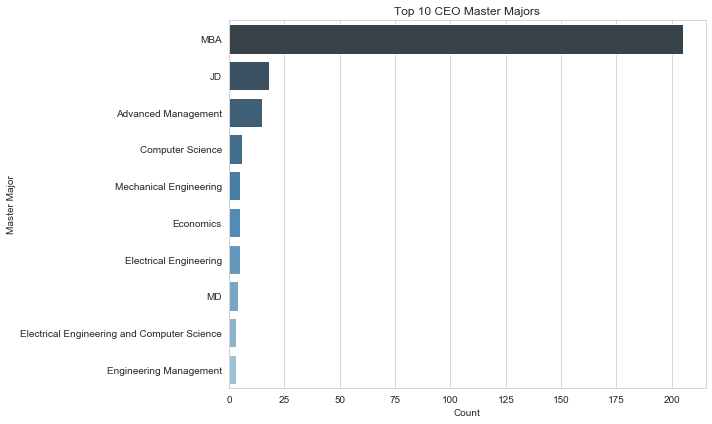

In [84]:
#set style
sns.set_style("whitegrid")

#create bar plot for the top 10 CEO Master Majors
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Count', y='CEO_MAST_MAJOR', data=top_10, palette='Blues_d')

#add titles and labels
plt.title('Top 10 CEO Master Majors')
plt.xlabel('Count')
plt.ylabel('Master Major')

#show plot
plt.tight_layout()
plt.show()

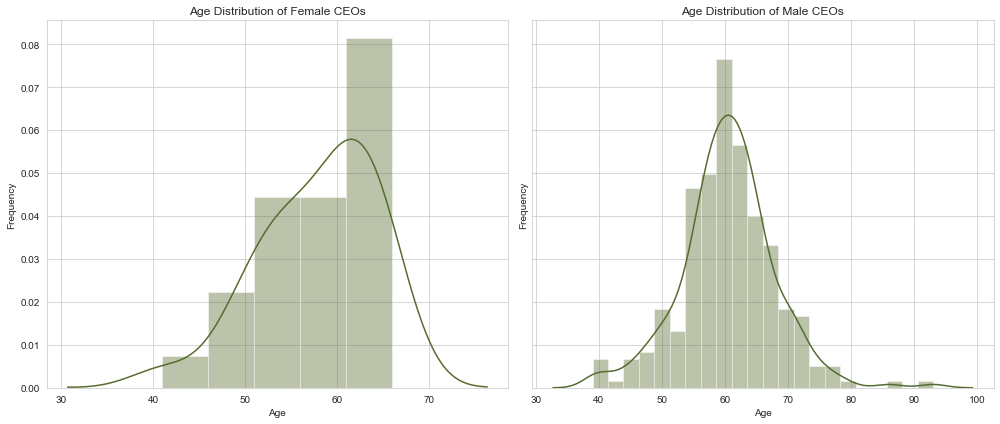

In [97]:
#filter the dataframe for female CEOs
female_ceos = df[df['CEO_WOMAN'] == 'yes']

#filter the dataframe for male CEOs
male_ceos = df[df['CEO_WOMAN'] == 'no']

#set color palette
custom_palette = ["#808080", "#556B2F", "#000080"]  # gray, sage Green, navy
sns.set_palette(custom_palette)

#set style
sns.set_style("whitegrid")

#create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

#plot the age distribution of female CEOs
sns.distplot(female_ceos['AGE'], ax=axes[0], color=custom_palette[1], kde=True)
axes[0].set_title('Age Distribution of Female CEOs')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

#plot the age distribution of male CEOs
sns.distplot(male_ceos['AGE'], ax=axes[1], color=custom_palette[1], kde=True)
axes[1].set_title('Age Distribution of Male CEOs')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

#show plot
plt.tight_layout()
plt.show()


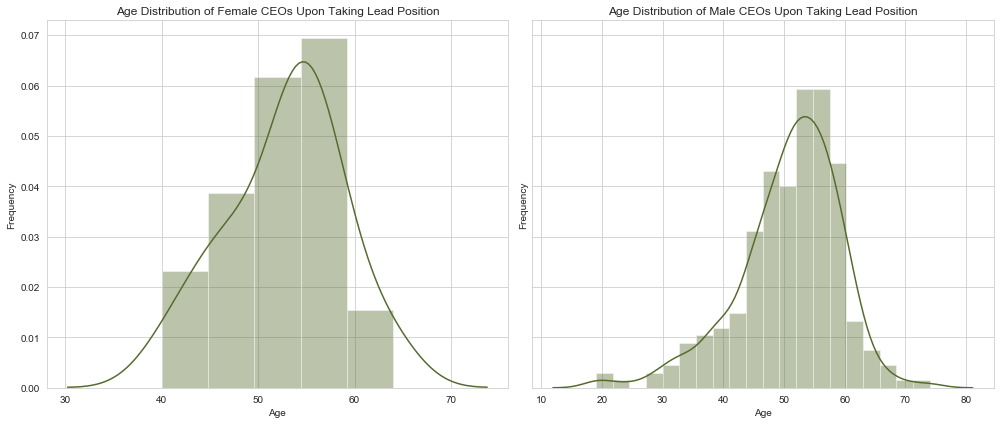

In [136]:
#filter the dataframe for female CEOs
female_ceos = df[df['CEO_WOMAN'] == 'yes']

#filter the dataframe for male CEOs
male_ceos = df[df['CEO_WOMAN'] == 'no']

#set color palette
custom_palette = ["#808080", "#556B2F", "#000080"]  # gray, sage Green, navy
sns.set_palette(custom_palette)

#set style
sns.set_style("whitegrid")

#create figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

#plot the age distribution of female CEOs
sns.distplot(female_ceos['AGE_TURNED_CEO'], ax=axes[0], color=custom_palette[1], kde=True)
axes[0].set_title('Age Distribution of Female CEOs Upon Taking Lead Position')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

#plot the age distribution of male CEOs
sns.distplot(male_ceos['AGE_TURNED_CEO'], ax=axes[1], color=custom_palette[1], kde=True)
axes[1].set_title('Age Distribution of Male CEOs Upon Taking Lead Position')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

#show plot
plt.tight_layout()
plt.show()

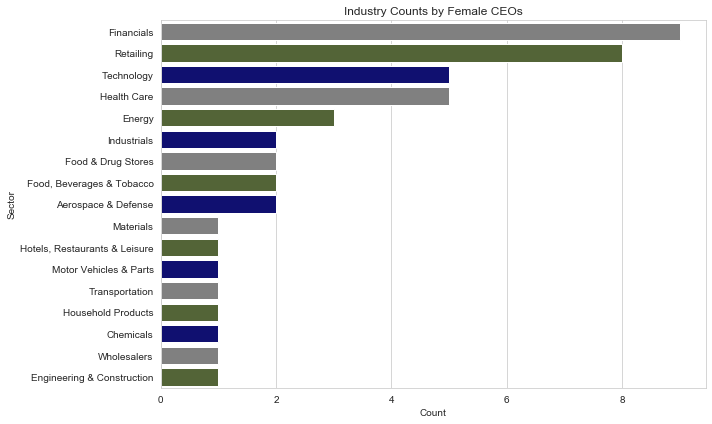

In [134]:
#filter dataframe for female CEOs
female_ceos = df[df['CEO_WOMAN'] == 'yes']

#set style
sns.set_style("whitegrid")

#set color palette
custom_palette = ["#808080", "#556B2F", "#000080"]  # gray, sage green, navy
sns.set_palette(custom_palette)

#create bar plot for sector counts by female CEOs
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(y='SECTOR', data=female_ceos, order=female_ceos['SECTOR'].value_counts().index, palette=custom_palette)
plt.title('Industry Counts by Female CEOs')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

In [127]:
#define a function to categorize age into age groups
def categorize_age(age):
    if age >= 20 and age <= 29:
        return '20s'
    elif age >= 30 and age <= 39:
        return '30s'
    elif age >= 40 and age <= 49:
        return '40s'
    elif age >= 50 and age <= 59:
        return '50s'
    elif age >= 60 and age <= 69:
        return '60s'
    elif age >= 70 and age <= 79:
        return '70s'
    elif age >= 80 and age <= 89:
        return '80s'
    elif age >= 90 and age <= 99:
        return '90s'
    elif age >= 100 and age <= 110:
        return '100+'
    else:
        return None  # Or any other value and to handle NaN

#apply the categorization function to create a new column 'age_group'
df['age_group'] = df['AGE'].apply(categorize_age)

#filter out rows where age is not null
filtered_df = df.dropna(subset=['AGE'])

#calculate age group counts
age_group_counts = filtered_df['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'age_group_count']

#calculate percentages
total_count = filtered_df.shape[0]
age_group_counts['percentage'] = (age_group_counts['age_group_count'] / total_count) * 100
age_group_counts['percentage'] = age_group_counts['percentage'].round(1)

#sort dataframe by age group
age_group_counts = age_group_counts.sort_values(by='age_group')

print(age_group_counts)


  age_group  age_group_count  percentage
4       30s                1         0.4
3       40s               18         6.6
1       50s              100        36.8
0       60s              127        46.7
2       70s               24         8.8
5       80s                1         0.4
6       90s                1         0.4


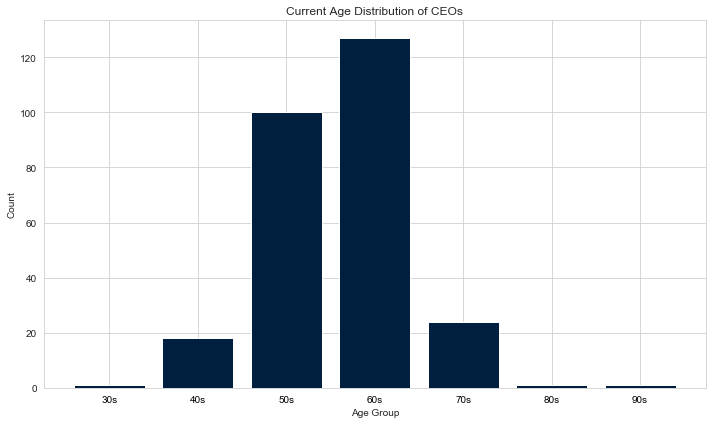

In [128]:
#define dark shade of navy
navy_color = '#001F3F'

#create bar chart of current CEO age distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts['age_group'], age_group_counts['age_group_count'], color=navy_color)
plt.title('Current Age Distribution of CEOs')
plt.xlabel('Age Group')
plt.ylabel('Count')

#adjust the rotation and alignment of the x-axis labels
plt.xticks(rotation=0, ha='center', color='black')  #adjust color to black

plt.tight_layout()
plt.show()

In [129]:
#define a function to categorize age into age groups
def categorize_age(age):
    if age >= 20 and age <= 29:
        return '20s'
    elif age >= 30 and age <= 39:
        return '30s'
    elif age >= 40 and age <= 49:
        return '40s'
    elif age >= 50 and age <= 59:
        return '50s'
    elif age >= 60 and age <= 69:
        return '60s'
    elif age >= 70 and age <= 79:
        return '70s'
    elif age >= 80 and age <= 89:
        return '80s'
    elif age >= 90 and age <= 99:
        return '90s'
    elif age >= 100 and age <= 110:
        return '100+'
    else:
        return None  # Or any other value or to handle NaN

#apply the categorization function to create a new column 'age_group'
df['age_group'] = df['AGE_TURNED_CEO'].apply(categorize_age)

#filter out rows where age is not null
filtered_df = df.dropna(subset=['AGE_TURNED_CEO'])

#calculate age group counts
age_group_counts = filtered_df['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'age_group_count']

#calculate percentages
total_count = filtered_df.shape[0]
age_group_counts['percentage'] = (age_group_counts['age_group_count'] / total_count) * 100
age_group_counts['percentage'] = age_group_counts['percentage'].round(1)

#sort dataframe by age group
age_group_counts = age_group_counts.sort_values(by='age_group')

print(age_group_counts)


  age_group  age_group_count  percentage
4       20s                4         1.5
3       30s               19         7.0
1       40s               73        26.8
0       50s              144        52.9
2       60s               29        10.7
5       70s                2         0.7


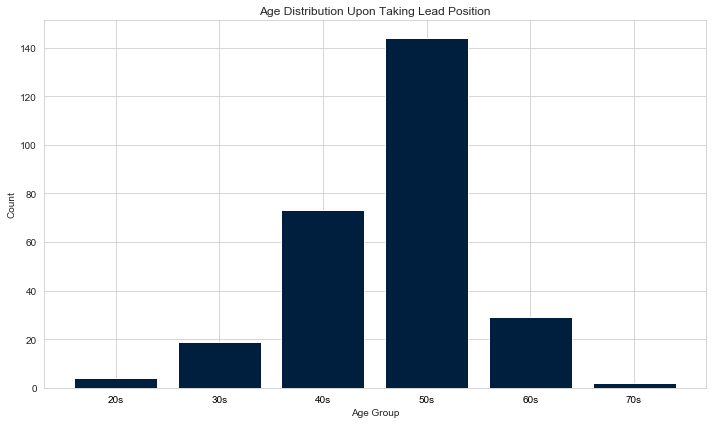

In [132]:
#define dark shade of navy
navy_color = '#001F3F'

#create bar chart for age distribution upon taking lead position
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts['age_group'], age_group_counts['age_group_count'], color=navy_color)
plt.title('Age Distribution Upon Taking Lead Position')
plt.xlabel('Age Group')
plt.ylabel('Count')

#adjust the rotation and alignment of the x-axis labels
plt.xticks(rotation=0, ha='center', color='black')  #adjust color to black

plt.tight_layout()
plt.show()